In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset CORRECTLY
# We use 'header=0' to tell pandas the first valid line is the header
# We skip row 0 (the "Experiment Started" line)
df = pd.read_csv("results.txt", skiprows=1) 

# OPTIONAL: If column names have spaces like " Importance_Score", strip them
df.columns = df.columns.str.strip()

# 2. Force conversion to numeric (Crucial Safety Step)
# This turns " 0.0 " into 0.0 and turns any text errors into NaN
df["Importance_Score"] = pd.to_numeric(df["Importance_Score"], errors='coerce')

# 3. Clean whitespace from text columns
df["Feature_Perturbed"] = df["Feature_Perturbed"].astype(str).str.strip()

# 4. Now run the sanity check
total_non_zero = df[df["Importance_Score"] > 0].shape[0]
print(f"Total Rows Loaded: {len(df)}")
print(f"Rows with Non-Zero Importance: {total_non_zero}")

if total_non_zero == 0:
    print("⚠️ WARNING: All importance scores are 0.0. (This might be correct for trivial features like Street Type)")
else:
    print("✅ Success: The LLM reacted to changes!")

df.head()

Total Rows Loaded: 395
Rows with Non-Zero Importance: 84
✅ Success: The LLM reacted to changes!


,Parcel_ID,Feature_Perturbed,Original_Price,New_Price,Importance_Score
0,533205110,Building Class,245000.0,245000.0,0.0
1,533205110,Zoning Classification,245000.0,245000.0,0.0
2,533205110,Lot Frontage (ft),245000.0,245000.0,0.0
3,533205110,Lot Area (sqft),245000.0,245000.0,0.0
4,533205110,Street Type,245000.0,245000.0,0.0


In [4]:
# Group by Feature to get the Average Importance across all houses
feature_stats = df.groupby("Feature_Perturbed")["Importance_Score"].agg(["mean", "std", "max", "count"])

# Sort by the most important features
feature_stats = feature_stats.sort_values(by="mean", ascending=False)

# Rename columns for the report
feature_stats = feature_stats.rename(columns={"mean": "Avg_Impact_($)", "std": "Variability", "max": "Max_Single_Impact"})

# Show the Top 10 Features (This is your "Answer Key")
print("Top 10 Most Influential Features:")
display(feature_stats.head(10))

Top 10 Most Influential Features:


,Avg_Impact_($),Variability,Max_Single_Impact,count
Feature_Perturbed,,,,
Year Sold,40000.0,36742.346142,100000.0,5
First Floor Area (sqft),22000.0,19235.384062,50000.0,5
Above Ground Living Area (sqft),18000.0,21679.483389,50000.0,5
Year Remodeled/Added,12000.0,21679.483389,50000.0,5
Kitchens Above Ground,12000.0,21679.483389,50000.0,5
Bedrooms Above Ground,10000.0,17320.508076,40000.0,5
Garage Capacity (Cars),8000.0,13038.404810,30000.0,5
Full Bathrooms,8000.0,13038.404810,30000.0,5
Overall Quality,8000.0,8366.600265,20000.0,5


/var/folders/m9/b36wl4j96vxgr9wbxq2zh6lm0000gn/T/ipykernel_4801/1963138731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


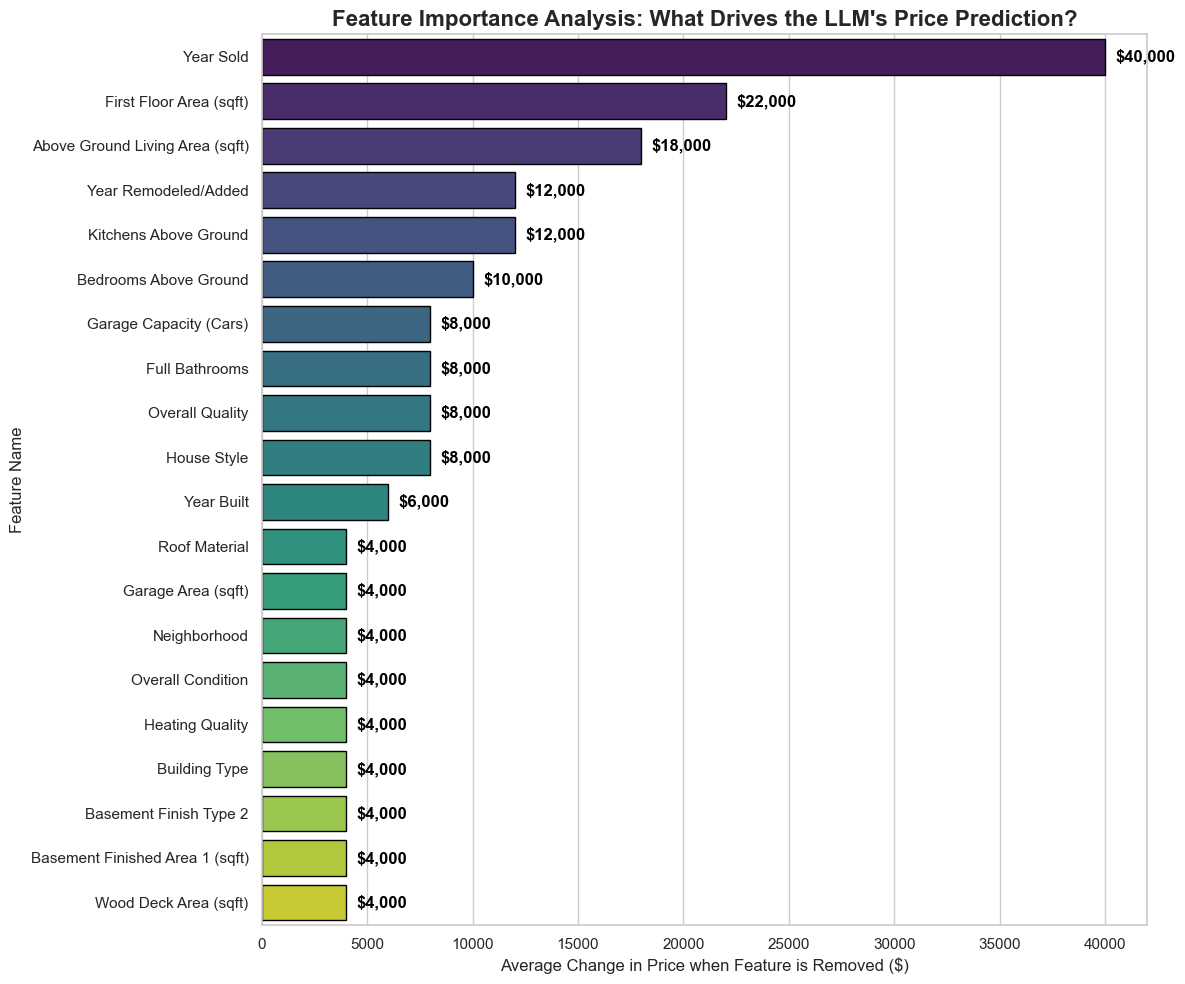

In [5]:
# Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))

# Select only the top 20 features to keep the graph readable
top_20_features = feature_stats.head(20)

# Create the Bar Chart
barplot = sns.barplot(
    x=top_20_features["Avg_Impact_($)"], 
    y=top_20_features.index, 
    palette="viridis",
    edgecolor="black"
)

# Add Labels & Titles for the Report
plt.title("Feature Importance Analysis: What Drives the LLM's Price Prediction?", fontsize=16, fontweight='bold')
plt.xlabel("Average Change in Price when Feature is Removed ($)", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)

# Add value labels to the end of bars
for i, v in enumerate(top_20_features["Avg_Impact_($)"]):
    barplot.text(v + 500, i, f"${v:,.0f}", color='black', va='center', fontweight='bold')

plt.tight_layout()

# Save the graph
plt.savefig("Final_Feature_Importance.png", dpi=300)
plt.show()